# Explore the data

This jupyter notebook is dedicated to exploring the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import colors
import numpy as np
import operator

## 1. Open and view all the files

In [2]:
GO=pd.read_csv('../data/GO_Processes_In_Resistance.csv')
PF_genes=pd.read_csv('../data/PFalciparum_Gene_GOterms.csv')
train=pd.read_csv('../data/SubCh1_TrainingData.csv')
test=pd.read_csv('../data/SubCh1_TestData.csv')

In [3]:
GO.head()

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance
0,GO:0020033,antigenic variation,0
1,GO:0098609,cell-cell adhesion,1
2,GO:0020035,"cytoadherence to microvasculature, mediated by...",1
3,GO:0020013,modulation by symbiont of host erythrocyte agg...,1
4,GO:0042000,translocation of peptides or proteins into host,0


In [4]:
GO.shape

(539, 3)

In [5]:
PF_genes.head()

,Gene ID,Genomic Location (Gene),Product Description,Computed GO Component IDs,Computed GO Components,Computed GO Function IDs,Computed GO Functions,Computed GO Process IDs,Computed GO Processes,Curated GO Component IDs,Curated GO Components,Curated GO Function IDs,Curated GO Functions,Curated GO Process IDs,Curated GO Processes,EC numbers,EC numbers from OrthoMCL
0,PF3D7_0100100,"Pf3D7_01_v3:29,510..37,126(+)","erythrocyte membrane protein 1, PfEMP1",GO:0016021,integral component of membrane,GO:0046789,host cell surface receptor binding,GO:0009405,pathogenesis,GO:0020002;GO:0020030,host cell plasma membrane;infected host cell s...,GO:0050839,cell adhesion molecule binding,GO:0020033;GO:0098609;GO:0020035;GO:0020013,antigenic variation;cell-cell adhesion;cytoadh...,NaN,NaN
1,PF3D7_0100200,"Pf3D7_01_v3:38,982..40,207(-)",rifin,NaN,NaN,NaN,NaN,NaN,NaN,GO:0020036;GO:0020002;GO:0020003,Maurer's cleft;host cell plasma membrane;symbi...,NaN,NaN,GO:0020033;GO:0020035;GO:0020013,antigenic variation;cytoadherence to microvasc...,NaN,NaN
2,PF3D7_0100300,"Pf3D7_01_v3:42,367..46,507(-)","erythrocyte membrane protein 1, PfEMP1",GO:0016021,integral component of membrane,GO:0046789,host cell surface receptor binding,GO:0009405,pathogenesis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PF3D7_0100400,"Pf3D7_01_v3:50,363..51,636(+)",rifin,NaN,NaN,NaN,NaN,NaN,NaN,GO:0020036;GO:0020002;GO:0020003,Maurer's cleft;host cell plasma membrane;symbi...,GO:0046812,host cell surface binding,GO:0020033;GO:0020035;GO:0020013,antigenic variation;cytoadherence to microvasc...,NaN,NaN
4,PF3D7_0100500,"Pf3D7_01_v3:53,169..53,280(-)","erythrocyte membrane protein 1 (PfEMP1), exon ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
PF_genes.shape

(5758, 17)

In [7]:
train.head()

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177


In [8]:
train.shape

(272, 5546)

In [9]:
test.head()

,Sample_Names,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_31.24HR.DHA.BRep1,isolate_31,24HR,DHA,BRep1,0.416583,-2.304394,-1.279308,-1.128485,0.129698,...,0.117763,-1.650283,-0.520373,-1.301428,-5.326124,-0.352736,-1.567931,-4.446439,-1.875440,NaN
1,isolate_31.24HR.DHA.BRep2,isolate_31,24HR,DHA,BRep2,0.247195,-2.176939,-1.470318,-0.676434,-0.206543,...,0.472336,-1.151134,-0.342707,-1.001569,-5.337602,-0.672201,-1.494983,-4.299427,-1.553652,NaN
2,isolate_31.24HR.UT.BRep1,isolate_31,24HR,UT,BRep1,-0.197699,-0.572531,0.270896,0.557528,-0.698585,...,-0.309768,-6.330446,-0.850889,-1.603832,-3.256602,-2.517157,-0.650735,-4.841146,0.153951,NaN
3,isolate_31.24HR.UT.BRep2,isolate_31,24HR,UT,BRep2,0.966916,-1.723830,-1.102392,-0.797996,0.032847,...,-0.254186,-1.516661,-1.916219,-1.858716,-6.483167,-0.827476,-1.454423,-5.264615,-2.367444,NaN
4,isolate_31.6HR.DHA.BRep1,isolate_31,6HR,DHA,BRep1,0.125273,-1.665749,-2.510245,-1.454094,-1.763451,...,0.653097,-2.383878,-2.731928,-2.557962,-5.697488,-3.466542,-2.147289,-4.358510,-1.929927,NaN


In [10]:
test.shape

(200, 5546)

(array([ 2.,  5.,  8., 17., 34., 49., 61., 48., 34., 14.]),
 array([-4.88476204, -4.4575967 , -4.03043136, -3.60326603, -3.17610069,
        -2.74893535, -2.32177001, -1.89460467, -1.46743934, -1.040274  ,
        -0.61310866]),
 <a list of 10 Patch objects>)

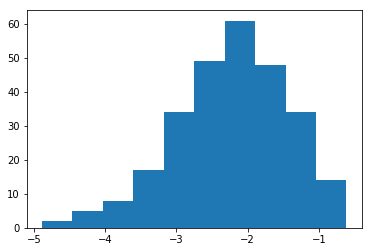

In [11]:
plt.hist(train["PF3D7_0100100"])

In [12]:
list_A = [1, 2, 3]
list_B = [3, 4, 5]
intersection = list( set(list_A) & set(list_B))
intersection

[3]

## 2. Find important genes

"""
SECTION DESCRIPTION HERE
"""

### 2.1 Add column "gene_count" and "genes" to the GO dataframe

From the dataframe PF_genes, extract the "Curated GO Process ID" and add it to the GO dataframe by matching them to the column "GO Process ID"

### 2.1.1 Create new DataFrame Gene_to_Curated_GO_Process_ID_df

In [13]:
Gene_to_Go_Process_df=pd.DataFrame({'Gene_ID':PF_genes['Gene ID'],\
                                               'Curated_Go_Process_IDs':PF_genes['Curated GO Process IDs']})
Gene_to_Go_Process_df.head(10)

,Gene_ID,Curated_Go_Process_IDs
0,PF3D7_0100100,GO:0020033;GO:0098609;GO:0020035;GO:0020013
1,PF3D7_0100200,GO:0020033;GO:0020035;GO:0020013
2,PF3D7_0100300,NaN
3,PF3D7_0100400,GO:0020033;GO:0020035;GO:0020013
4,PF3D7_0100500,NaN
5,PF3D7_0100600,GO:0020033
6,PF3D7_0100700,NaN
7,PF3D7_0100800,GO:0020033;GO:0020035;GO:0020013
8,PF3D7_0100900,GO:0020033;GO:0020035;GO:0020013
9,PF3D7_0101000,GO:0020033;GO:0020035;GO:0020013


In [14]:
Gene_to_Go_Process_df.dropna(inplace=True)
Gene_to_Go_Process_df['Curated_Go_Process_IDs']=\
    Gene_to_Go_Process_df['Curated_Go_Process_IDs']\
    .str.split(';', n=-1)

In [15]:
Gene_to_Go_Process_df.head(10)

,Gene_ID,Curated_Go_Process_IDs
0,PF3D7_0100100,"[GO:0020033, GO:0098609, GO:0020035, GO:0020013]"
1,PF3D7_0100200,"[GO:0020033, GO:0020035, GO:0020013]"
3,PF3D7_0100400,"[GO:0020033, GO:0020035, GO:0020013]"
5,PF3D7_0100600,[GO:0020033]
7,PF3D7_0100800,"[GO:0020033, GO:0020035, GO:0020013]"
8,PF3D7_0100900,"[GO:0020033, GO:0020035, GO:0020013]"
9,PF3D7_0101000,"[GO:0020033, GO:0020035, GO:0020013]"
12,PF3D7_0101300,[GO:0042000]
15,PF3D7_0101600,"[GO:0020033, GO:0020035, GO:0020013]"
17,PF3D7_0101800,[GO:0020013]


### 2.1.2 Reorganize Gene_to_Go_Process_df to map each Curated_Go_Process_ID to the corresponding Gene_ID

In [16]:
GO_Process_to_Gene_list=[]

for idx, row in Gene_to_Go_Process_df.iterrows():
    for GO_Process in row['Curated_Go_Process_IDs']:
        GO_Process_to_Gene_list.append([GO_Process,row['Gene_ID']])

GO_Process_to_Gene_df=pd.DataFrame(GO_Process_to_Gene_list, 
                                   columns=['Curated_Go_Process_IDs','Gene_ID'])

In [17]:
GO_Process_to_Gene_df.sort_values('Curated_Go_Process_IDs', 
                                 inplace=True)
GO_Process_to_Gene_df.reset_index(drop=True,inplace=True)

In [18]:
GO_Process_to_Gene_df=GO_Process_to_Gene_df\
.groupby('Curated_Go_Process_IDs')['Gene_ID']\
.apply(list).to_frame()

In [19]:
GO_Process_to_Gene_df.reset_index(inplace=True)

In [20]:
GO_Process_to_Gene_df.head(10)

,Curated_Go_Process_IDs,Gene_ID
0,GO:0000027,"[PF3D7_API03500, PF3D7_0729400, PF3D7_0921800,..."
1,GO:0000042,[PF3D7_0621350]
2,GO:0000045,[PF3D7_1015900]
3,GO:0000055,"[PF3D7_1423000, PF3D7_0729300]"
4,GO:0000070,[PF3D7_1130700]
5,GO:0000079,[PF3D7_1304700]
6,GO:0000165,[PF3D7_1113900]
7,GO:0000184,[PF3D7_1005500]
8,GO:0000209,[PF3D7_1211800]
9,GO:0000226,"[PF3D7_1008700, PF3D7_0803700]"


### 2.1.3 Add the column Gene_Count to the GO_Process_to_Gene_df

In [21]:
Gene_Count=[len(gene_list) for gene_list in list(GO_Process_to_Gene_df["Gene_ID"])]
GO_Process_to_Gene_df['Gene_Count']=Gene_Count
GO_Process_to_Gene_df.head()

,Curated_Go_Process_IDs,Gene_ID,Gene_Count
0,GO:0000027,"[PF3D7_API03500, PF3D7_0729400, PF3D7_0921800,...",9
1,GO:0000042,[PF3D7_0621350],1
2,GO:0000045,[PF3D7_1015900],1
3,GO:0000055,"[PF3D7_1423000, PF3D7_0729300]",2
4,GO:0000070,[PF3D7_1130700],1


### 2.1.4 Merge the DataFrames Go and GO_Process_IDs by the GO_Process column

In [22]:
GO=pd.merge(GO,GO_Process_to_Gene_df,left_on='GO Process ID',
             right_on='Curated_Go_Process_IDs')
GO.drop('Curated_Go_Process_IDs', axis=1, inplace=True)
GO.head()

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0020033,antigenic variation,0,"[PF3D7_0100600, PF3D7_1254000, PF3D7_1200100, ...",202
1,GO:0098609,cell-cell adhesion,1,"[PF3D7_1041300, PF3D7_0412700, PF3D7_1100100, ...",57
2,GO:0020035,"cytoadherence to microvasculature, mediated by...",1,"[PF3D7_0200600, PF3D7_1300200, PF3D7_0413200, ...",165
3,GO:0020013,modulation by symbiont of host erythrocyte agg...,1,"[PF3D7_1101100, PF3D7_1200600, PF3D7_1200100, ...",190
4,GO:0042000,translocation of peptides or proteins into host,0,"[PF3D7_0101300, PF3D7_0114100, PF3D7_0713100, ...",10


### 2.2 Find the distribution of Gene_Count

Text(0.5, 1.0, 'Gene_Count distribution: All GO Processes')

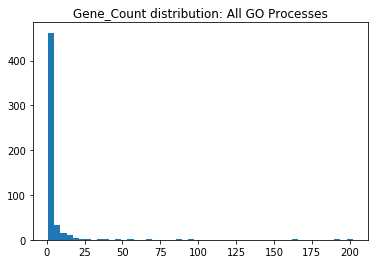

In [23]:
plt.hist(GO['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: All GO Processes')

Text(0.5, 1.0, 'Gene_Count distribution: GO Processes not involved in Artemisin Resistance')

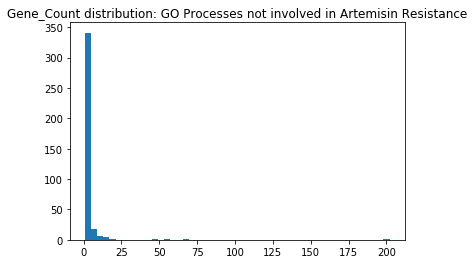

In [24]:
plt.hist(GO[GO['IsInvolvedInArtemisinResistance']==0]['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: GO Processes not involved in Artemisin Resistance')

Text(0.5, 1.0, 'Gene_Count distribution: GO Processes involved in Artemisin Resistance')

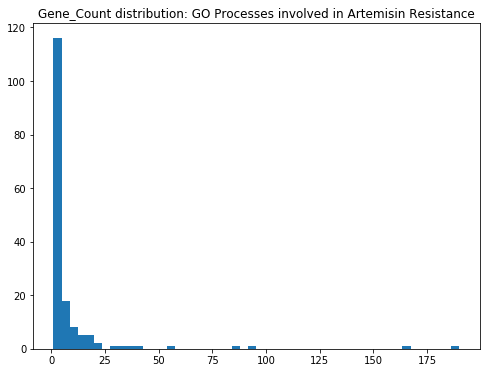

In [25]:
plt.figure(figsize=(8,6))
plt.hist(GO[GO['IsInvolvedInArtemisinResistance']==1]['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: GO Processes involved in Artemisin Resistance')

### 2.3 Filter the GO DataFrame

Keep the Go Processes Involved in Artemisin Resistance and Gene_Count <= 25

In [26]:
GO=GO[GO['IsInvolvedInArtemisinResistance']==1].reset_index(drop=True)
GO=GO[GO['Gene_Count']<=25].reset_index(drop=True)

In [27]:
GO.head(10)

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0015031,protein transport,1,"[PF3D7_1434700, PF3D7_0501300, PF3D7_0103100, ...",6
1,GO:0042147,"retrograde transport, endosome to Golgi",1,"[PF3D7_0103100, PF3D7_1250300, PF3D7_1110500, ...",4
2,GO:0015860,purine nucleoside transmembrane transport,1,"[PF3D7_1347200, PF3D7_0103200]",2
3,GO:2001139,negative regulation of phospholipid transport,1,[PF3D7_0104200],1
4,GO:0015914,phospholipid transport,1,"[PF3D7_0104200, PF3D7_1463500, PF3D7_1219600]",3
5,GO:0060627,regulation of vesicle-mediated transport,1,"[PF3D7_1144900, PF3D7_0211200, PF3D7_1231100, ...",10
6,GO:0000278,mitotic cell cycle,1,"[PF3D7_0107000, PF3D7_1446600, PF3D7_0317200, ...",4
7,GO:0009405,pathogenesis,1,"[PF3D7_0826100, PF3D7_1209300, PF3D7_1302200, ...",10
8,GO:0010998,regulation of translational initiation by eIF2...,1,[PF3D7_0107600],1
9,GO:0007021,tubulin complex assembly,1,[PF3D7_0109400],1


### 2.4 Create a list of unique genes involved in Artemisin resistance

In [28]:
result = set()
for row in range(len(GO)):
    result = result | set(GO["Gene_ID"][row])
result = list(result)
print("Total of genes including after filtering: {}".format(len(result)))

Total of genes including after filtering: 489


### Save final gene list to file

In [29]:
f = open("../data/Important_PF_genes.txt", "w")
f.write("\n".join(result))
f.close()

### 2.5 Filter the train DataFrame 

Keep only the important genes found in previous steps.

In [30]:
genes_to_keep = set(list(train.columns)) & set(result)
genes_to_keep = list(genes_to_keep)
columns_to_keep = list(train.columns)[0:5] + \
[list(train.columns)[-1]] + genes_to_keep
columns_to_keep

['Sample_Name',
 'Isolate',
 'Timepoint',
 'Treatment',
 'BioRep',
 'DHA_IC50',
 'PF3D7_1340700',
 'PF3D7_1246100',
 'PF3D7_0106800',
 'PF3D7_1431300',
 'PF3D7_1426500',
 'PF3D7_1216500',
 'PF3D7_0418500',
 'PF3D7_0821800',
 'PF3D7_1432700',
 'PF3D7_1463700',
 'PF3D7_1329100',
 'PF3D7_1032500',
 'PF3D7_0319600',
 'PF3D7_0503100',
 'PF3D7_0813800',
 'PF3D7_0415400',
 'PF3D7_1423000',
 'PF3D7_1223900',
 'PF3D7_0321200',
 'PF3D7_1220900',
 'PF3D7_1034400',
 'PF3D7_0211400',
 'PF3D7_0708500',
 'PF3D7_1211000',
 'PF3D7_1418100',
 'PF3D7_1437700',
 'PF3D7_0729900',
 'PF3D7_1426300',
 'PF3D7_1134000',
 'PF3D7_0807300',
 'PF3D7_1302200',
 'PF3D7_0805200',
 'PF3D7_0816000',
 'PF3D7_0909200',
 'PF3D7_1251200',
 'PF3D7_0826100',
 'PF3D7_1446600',
 'PF3D7_0820200',
 'PF3D7_1144900',
 'PF3D7_0826700',
 'PF3D7_0711000',
 'PF3D7_1209900',
 'PF3D7_0206200',
 'PF3D7_1246200',
 'PF3D7_1119500',
 'PF3D7_1121700',
 'PF3D7_0211600',
 'PF3D7_1141600',
 'PF3D7_1360500',
 'PF3D7_1008400',
 'PF3D7_1471100',
 '

## Save genes_to_keep to file

In [31]:
f=open('../data/genes_to_keep.txt','w')
f.write("\n".join(genes_to_keep))
f.close()

In [32]:
filtered_train = train[columns_to_keep]

In [33]:
filtered_train.head(10)

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,DHA_IC50,PF3D7_1340700,PF3D7_1246100,PF3D7_0106800,PF3D7_1431300,...,PF3D7_0417100,PF3D7_1332000,PF3D7_1204300,PF3D7_0729400,PF3D7_0820700,PF3D7_1320500,PF3D7_0109400,PF3D7_0626800,PF3D7_1457000,PF3D7_1361800
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,2.177,-0.384138,-0.099717,0.383352,-0.828819,...,0.937800,-1.143851,-0.673918,0.017697,0.153865,-0.468819,-0.719270,-1.258268,-0.950112,0.371280
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,2.177,-0.429965,2.121152,-0.731963,0.395816,...,-0.586820,0.035202,-0.644126,0.150714,-0.974436,-0.265465,2.185597,-0.151842,0.470459,0.039944
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,2.177,-0.829628,1.926897,0.774406,0.443488,...,-1.263473,0.114450,-0.076646,0.862712,-1.190595,0.580798,1.238853,0.763311,0.992976,-0.884423
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,2.177,-0.080152,0.667620,-0.721824,0.700349,...,-0.638501,0.543407,0.281508,0.290048,-0.560563,-0.520584,1.677051,-0.596301,0.407555,-0.122242
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,2.177,0.293352,0.670575,0.025564,0.364250,...,-1.942274,0.267782,0.481788,-0.216202,0.042085,0.477036,2.050341,-0.426880,0.302197,-0.727159
5,isolate_01.6HR.DHA.BRep2,isolate_01,6HR,DHA,BRep2,2.177,0.188223,1.086713,-0.299474,0.529667,...,-0.495332,0.424155,-0.024687,0.103952,-0.001243,-1.140406,1.189985,-1.111654,0.116380,1.546763
6,isolate_01.6HR.UT.BRep1,isolate_01,6HR,UT,BRep1,2.177,-0.194722,0.674931,0.943364,0.668031,...,-1.296678,0.435284,0.914518,0.268929,-0.168681,-0.161972,1.987974,0.379783,0.564794,-1.243210
7,isolate_01.6HR.UT.BRep2,isolate_01,6HR,UT,BRep2,2.177,-0.452993,0.250319,0.767760,1.122203,...,-1.499146,0.247548,0.107451,0.616013,-1.063909,-0.556305,-0.033896,-0.195982,0.628105,0.848588
8,isolate_02.24HR.DHA.BRep1,isolate_02,24HR,DHA,BRep1,1.697,0.064682,1.357478,-0.351062,0.732093,...,-1.175795,0.687383,0.005727,0.277132,-0.523694,-0.749498,1.418514,-0.736523,0.382458,1.277809
9,isolate_02.24HR.DHA.BRep2,isolate_02,24HR,DHA,BRep2,1.697,0.366686,-0.561795,-0.129113,1.392860,...,-0.734817,0.998576,1.216181,0.164138,-1.124864,-0.487833,2.045933,-0.738534,0.655066,-1.692811


## 3. Create new train DataFrame with engineered features

In [34]:
aggregated_means_train = filtered_train.groupby(["Isolate","Timepoint","Treatment"]).mean()

In [35]:
aggregated_means_train.head(10)

DHA_IC50  PF3D7_1340700  PF3D7_1246100  \
Isolate    Timepoint Treatment                                           
isolate_01 24HR      DHA           2.177      -0.407052       1.010718   
                     UT            2.177      -0.454890       1.297258   
           6HR       DHA           2.177       0.240787       0.878644   
                     UT            2.177      -0.323857       0.462625   
isolate_02 24HR      DHA           1.697       0.013135       0.929380   
                     UT            1.697      -0.288905       1.122397   
           6HR       DHA           1.697       0.156844       0.590085   
                     UT            1.697      -0.258988       1.358618   
isolate_03 24HR      DHA           1.799       0.048070       1.046211   
                     UT            1.799      -0.340294       1.230160   

                                PF3D7_0106800  PF3D7_1431300  PF3D7_1426500  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA            -0.174305      -0.216501       0.524281   
                     UT              0.026291       0.571918      -0.306888   
           6HR       DHA            -0.136955       0.446958      -0.605972   
                     UT              0.855562       0.895117      -0.323191   
isolate_02 24HR      DHA            -0.556308       0.908438      -0.539663   
                     UT             -0.449670       0.512126       0.065007   
           6HR       DHA             0.135455       0.302822      -0.397864   
                     UT             -0.917905       0.563336      -0.091138   
isolate_03 24HR      DHA             0.921045       0.524548      -0.444966   
                     UT             -0.025513       0.229873       0.368322   

                                PF3D7_1216500  PF3D7_0418500  PF3D7_0821800  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA             0.212676       0.119851      -0.608089   
                     UT             -0.061714       1.858002       0.078427   
           6HR       DHA            -1.564953       2.327222      -0.053635   
                     UT             -0.030951       1.864451       0.097324   
isolate_02 24HR      DHA            -0.215795       1.685783       0.406067   
                     UT             -0.526787       1.043428      -0.209201   
           6HR       DHA            -0.568126       1.742313       0.110687   
                     UT             -0.736463       1.235013      -0.404224   
isolate_03 24HR      DHA            -0.981150       1.160771       0.433219   
                     UT              0.077777       0.636993      -0.632343   

                                PF3D7_1432700  ...  PF3D7_0417100  \
Isolate    Timepoint Treatment                 ...                  
isolate_01 24HR      DHA            -0.092648  ...       0.175490   
                     UT             -0.327924  ...      -0.950987   
           6HR       DHA             0.595979  ...      -1.218803   
                     UT             -0.228450  ...      -1.397912   
isolate_02 24HR      DHA            -0.553368  ...      -0.907186   
                     UT             -0.215320  ...      -0.479935   
           6HR       DHA             0.012357  ...      -0.564512   
                     UT             -0.510769  ...      -0.518739   
isolate_03 24HR      DHA             0.243015  ...      -1.020533   
                     UT              0.075238  ...      -0.275750   

                                PF3D7_1332000  PF3D7_1204300  PF3D7_0729400  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA            -0.554325      -0.659022       0.084205   
                     UT              0.328929       0.102431       0.576380   
           6HR       DHA             0.345969       0.228550      -0.056125   
                     

In [36]:
aggregated_means_train.index[5]


('isolate_02', '24HR', 'UT')

In [37]:
genes_list=genes_to_keep

### 3.1 Flatten the aggregated_means_train data frame 

We do this so that each row is an isolate and the different timepoints and treatments become columns

**Before**
```python

| Isolate  | Timepoint | Treatment | PF3D7_0107600 |
|----------|-----------|-----------|---------------|
|isolate_01|       24Hr|        DHA|         value1|
|          |           |         UT|         value2|
|          |        6Hr|        DHA|         value3|
|          |           |         UT|         value4|
```

**After**
```python
print(flat_train)

| Isolate  | PF3D7_0107600_24HR_DHA | PF3D7_0107600_24HR_UT | PF3D7_0107600_6HR_DHA | PF3D7_0107600_6HR_UT |
|----------|------------------------|-----------------------|-----------------------|----------------------|
|isolate_01|                  value1|                 value2|                 value3|                value4|
```

In [38]:
gene_dict={}
isolate_comb_list=['_24HR_DHA','_24HR_UT','_6HR_DHA','_6HR_UT']
for gene in genes_list:
    gene_dict[gene]=[gene+comb for comb in isolate_comb_list]

In [39]:
gene_dict

{'PF3D7_1340700': ['PF3D7_1340700_24HR_DHA',
  'PF3D7_1340700_24HR_UT',
  'PF3D7_1340700_6HR_DHA',
  'PF3D7_1340700_6HR_UT'],
 'PF3D7_1246100': ['PF3D7_1246100_24HR_DHA',
  'PF3D7_1246100_24HR_UT',
  'PF3D7_1246100_6HR_DHA',
  'PF3D7_1246100_6HR_UT'],
 'PF3D7_0106800': ['PF3D7_0106800_24HR_DHA',
  'PF3D7_0106800_24HR_UT',
  'PF3D7_0106800_6HR_DHA',
  'PF3D7_0106800_6HR_UT'],
 'PF3D7_1431300': ['PF3D7_1431300_24HR_DHA',
  'PF3D7_1431300_24HR_UT',
  'PF3D7_1431300_6HR_DHA',
  'PF3D7_1431300_6HR_UT'],
 'PF3D7_1426500': ['PF3D7_1426500_24HR_DHA',
  'PF3D7_1426500_24HR_UT',
  'PF3D7_1426500_6HR_DHA',
  'PF3D7_1426500_6HR_UT'],
 'PF3D7_1216500': ['PF3D7_1216500_24HR_DHA',
  'PF3D7_1216500_24HR_UT',
  'PF3D7_1216500_6HR_DHA',
  'PF3D7_1216500_6HR_UT'],
 'PF3D7_0418500': ['PF3D7_0418500_24HR_DHA',
  'PF3D7_0418500_24HR_UT',
  'PF3D7_0418500_6HR_DHA',
  'PF3D7_0418500_6HR_UT'],
 'PF3D7_0821800': ['PF3D7_0821800_24HR_DHA',
  'PF3D7_0821800_24HR_UT',
  'PF3D7_0821800_6HR_DHA',
  'PF3D7_0821800_6H

In [40]:
isolates_list=aggregated_means_train.index.get_level_values(0)
isolates_list=list(dict.fromkeys(isolates_list))
isolates_list

['isolate_01',
 'isolate_02',
 'isolate_03',
 'isolate_04',
 'isolate_05',
 'isolate_06',
 'isolate_07',
 'isolate_08',
 'isolate_09',
 'isolate_10',
 'isolate_11',
 'isolate_12',
 'isolate_13',
 'isolate_14',
 'isolate_15',
 'isolate_16',
 'isolate_17',
 'isolate_18',
 'isolate_19',
 'isolate_20',
 'isolate_21',
 'isolate_22',
 'isolate_23',
 'isolate_24',
 'isolate_25',
 'isolate_26',
 'isolate_27',
 'isolate_28',
 'isolate_29',
 'isolate_30']

### Save isolates_list to file

In [41]:
f = open("../data/isolates.txt", "w")
f.write("\n".join(isolates_list))
f.close()

In [42]:
flat_train=pd.DataFrame()
genes=[]
for gene in genes_list:
    temp_list=[]
    for isolate in isolates_list:
        temp_list.append(aggregated_means_train.loc[isolate][gene].tolist())
    flat_train=pd.concat([flat_train,pd.DataFrame(data=temp_list,columns=gene_dict[gene])],axis=1)



In [43]:
flat_train.index=isolates_list
flat_train.head(10)

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_6HR_DHA,PF3D7_0626800_6HR_UT,PF3D7_1457000_24HR_DHA,PF3D7_1457000_24HR_UT,PF3D7_1457000_6HR_DHA,PF3D7_1457000_6HR_UT,PF3D7_1361800_24HR_DHA,PF3D7_1361800_24HR_UT,PF3D7_1361800_6HR_DHA,PF3D7_1361800_6HR_UT
isolate_01,-0.407052,-0.454890,0.240787,-0.323857,1.010718,1.297258,0.878644,0.462625,-0.174305,0.026291,...,-0.769267,0.091900,-0.239827,0.700266,0.209288,0.596450,0.205612,-0.503332,0.409802,-0.197311
isolate_02,0.013135,-0.288905,0.156844,-0.258988,0.929380,1.122397,0.590085,1.358618,-0.556308,-0.449670,...,-0.136209,-0.774782,0.563347,0.106778,0.608207,0.119563,0.058011,0.402304,0.338942,0.264658
isolate_03,0.048070,-0.340294,-0.135059,-0.284724,1.046211,1.230160,0.508137,0.867778,0.921045,-0.025513,...,0.005131,-1.307780,0.060194,-0.519451,0.921360,-0.822275,0.302059,0.415665,-0.284549,0.424258
isolate_04,-0.072510,-0.545671,-0.385077,-0.304287,0.965489,1.154897,0.879867,1.587606,0.367313,-0.390621,...,-0.716626,-1.356772,0.387302,0.290998,0.451772,0.198463,0.794436,-0.078753,0.860199,0.932406
isolate_05,-0.226061,-0.371508,-0.262047,-0.062498,1.234422,1.881968,1.436707,0.874129,-0.399773,-1.257496,...,-0.437585,-0.214190,0.613085,-0.739451,0.619896,0.469621,0.163324,0.724339,0.360577,-0.317168
isolate_06,0.325334,-0.073327,-0.246646,-0.808128,1.013381,0.981976,1.148401,0.829421,-0.520133,0.597887,...,0.123925,-0.328088,0.827816,0.075749,0.742373,-0.007341,0.415318,1.189405,-1.113230,-0.227012
isolate_07,-0.579032,0.334247,0.417771,-0.650699,1.533666,0.292305,1.112950,1.072664,-0.596750,0.284245,...,-0.238255,-0.226589,0.431679,0.306204,0.260145,0.424262,0.103186,0.065956,0.412228,0.185463
isolate_08,-0.381277,-0.214670,-0.571125,-0.643802,1.104038,1.318057,1.407462,1.613837,0.396688,1.183321,...,-0.989983,-0.764423,0.356477,0.338954,0.237507,0.281530,-0.308905,0.294698,0.642557,0.387165
isolate_09,-0.413461,-0.043404,-0.405628,0.009053,1.303886,0.619136,0.953825,1.023697,0.269215,-0.764269,...,-1.423271,0.014559,0.373425,1.321629,-0.301058,0.510176,0.185115,-1.071585,0.037128,0.027076
isolate_10,-0.128044,-0.384314,-0.425709,-0.028991,1.590397,1.095050,1.091923,0.573890,-0.292944,-0.008048,...,0.277842,-0.431402,-0.052753,0.870014,1.158604,-0.480199,0.723051,0.146979,-0.879516,0.585226


### 3.2 Clustergram

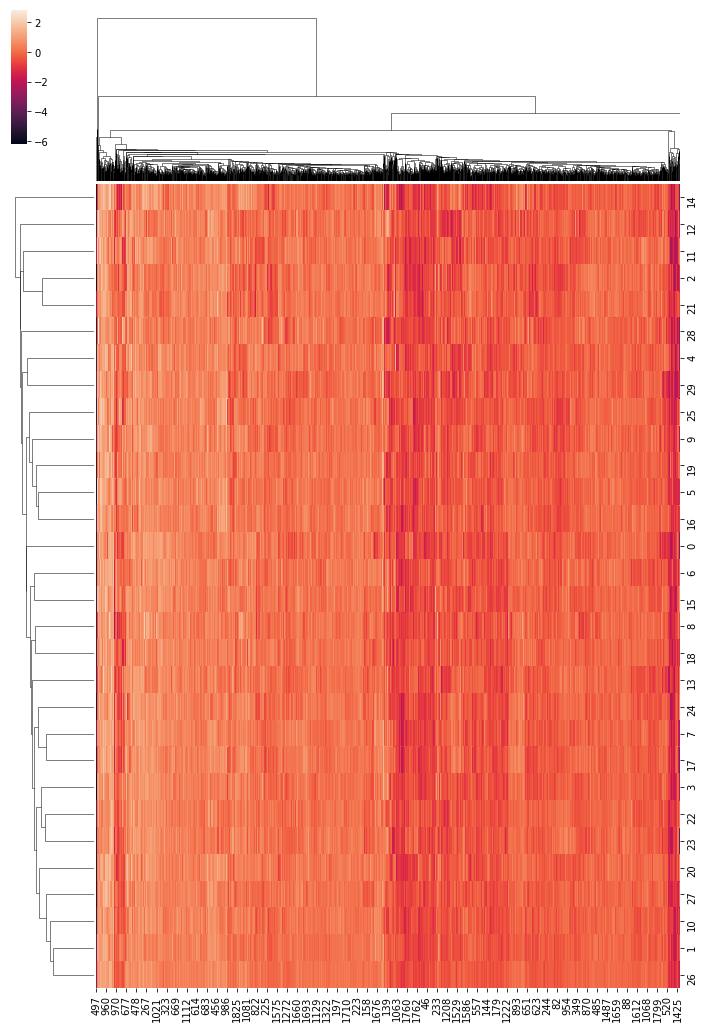

In [44]:
cltr=sn.clustermap(flat_train.values,figsize=(12,18))

In [45]:
reordered_isolates = cltr.dendrogram_row.reordered_ind

In [46]:
flat_IC50=train[["Isolate",'DHA_IC50']].drop_duplicates(keep='first')

flat_IC50.index = list(flat_IC50["Isolate"])

del flat_IC50["Isolate"]
flat_IC50

,DHA_IC50
isolate_01,2.1770
isolate_02,1.6970
isolate_03,1.7990
isolate_04,0.7100
isolate_05,2.0250
isolate_06,1.3670
isolate_07,0.8567
isolate_08,3.4600
isolate_09,1.7650
isolate_10,1.7540


## Save flat_IC50 to file

In [47]:
flat_IC50.to_csv('../data/flat_IC50.csv',sep=',')

In [48]:
flat_IC50.sort_values("DHA_IC50",ascending=False)

,DHA_IC50
isolate_08,3.4600
isolate_24,2.2360
isolate_16,2.2100
isolate_01,2.1770
isolate_05,2.0250
isolate_29,1.9900
isolate_19,1.9060
isolate_20,1.8240
isolate_11,1.8200
isolate_03,1.7990


### 3.3 Add the diferential between each timepoint-treatment combination

Add 4 columns containing the differential between the different timepoints and treatment combinations:

Delta_A=(24HR - 6HR) with DHA

Delta_B=(24HR - 6HR) with UT 

Delta_C=(DHA - UT) after 6HR

Delta_D=(DHA - UT) after 24HR


In [49]:
gene_deltas_dict={}
deltas_list=['_24HR_6HR_DHA','_24_6HR_UT','_DHA_UT_6HR','_DHA_UT_24HR']
for gene in genes_list:
    gene_deltas_dict[gene]=[gene+delta for delta in deltas_list]

In [50]:
gene_deltas_dict

{'PF3D7_1340700': ['PF3D7_1340700_24HR_6HR_DHA',
  'PF3D7_1340700_24_6HR_UT',
  'PF3D7_1340700_DHA_UT_6HR',
  'PF3D7_1340700_DHA_UT_24HR'],
 'PF3D7_1246100': ['PF3D7_1246100_24HR_6HR_DHA',
  'PF3D7_1246100_24_6HR_UT',
  'PF3D7_1246100_DHA_UT_6HR',
  'PF3D7_1246100_DHA_UT_24HR'],
 'PF3D7_0106800': ['PF3D7_0106800_24HR_6HR_DHA',
  'PF3D7_0106800_24_6HR_UT',
  'PF3D7_0106800_DHA_UT_6HR',
  'PF3D7_0106800_DHA_UT_24HR'],
 'PF3D7_1431300': ['PF3D7_1431300_24HR_6HR_DHA',
  'PF3D7_1431300_24_6HR_UT',
  'PF3D7_1431300_DHA_UT_6HR',
  'PF3D7_1431300_DHA_UT_24HR'],
 'PF3D7_1426500': ['PF3D7_1426500_24HR_6HR_DHA',
  'PF3D7_1426500_24_6HR_UT',
  'PF3D7_1426500_DHA_UT_6HR',
  'PF3D7_1426500_DHA_UT_24HR'],
 'PF3D7_1216500': ['PF3D7_1216500_24HR_6HR_DHA',
  'PF3D7_1216500_24_6HR_UT',
  'PF3D7_1216500_DHA_UT_6HR',
  'PF3D7_1216500_DHA_UT_24HR'],
 'PF3D7_0418500': ['PF3D7_0418500_24HR_6HR_DHA',
  'PF3D7_0418500_24_6HR_UT',
  'PF3D7_0418500_DHA_UT_6HR',
  'PF3D7_0418500_DHA_UT_24HR'],
 'PF3D7_0821800': ['

In [51]:
for gene in gene_dict.keys():
    
    state1=gene_dict[gene][0] #gene_24HR_DHA
    state2=gene_dict[gene][1] #gene_24HR_UT
    state3=gene_dict[gene][2] #gene_6HR_DHA
    state4=gene_dict[gene][3] #gene_6HR_UT
    
    delta_A=flat_train[state1]-flat_train[state3]
    delta_B=flat_train[state2]-flat_train[state4]
    delta_C=flat_train[state3]-flat_train[state4]
    delta_D=flat_train[state1]-flat_train[state2]
    
    delta_A_label=gene_deltas_dict[gene][0] #gene_24HR_6HR_DHA
    delta_B_label=gene_deltas_dict[gene][1] #gene_24HR_6HR_UT
    delta_C_label=gene_deltas_dict[gene][2] #gene_DHA_UT_6HR
    delta_D_label=gene_deltas_dict[gene][3] #gene_DHA_UT_24HR
    
    temp_df=pd.DataFrame({delta_A_label:delta_A,delta_B_label:delta_B,delta_C_label:delta_C,delta_D_label:delta_D})
    flat_train=pd.concat([flat_train,temp_df],axis=1)

In [52]:
flat_train.head(10)

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_01,-0.407052,-0.454890,0.240787,-0.323857,1.010718,1.297258,0.878644,0.462625,-0.174305,0.026291,...,-0.861167,-0.788560,-0.449115,0.103816,-0.387161,-0.940092,-0.204190,-0.306021,0.607113,0.708944
isolate_02,0.013135,-0.288905,0.156844,-0.258988,0.929380,1.122397,0.590085,1.358618,-0.556308,-0.449670,...,0.638573,-0.022643,-0.044861,-0.012785,0.488644,0.456568,-0.280932,0.137645,0.074284,-0.344293
isolate_03,0.048070,-0.340294,-0.135059,-0.284724,1.046211,1.230160,0.508137,0.867778,0.921045,-0.025513,...,1.312910,0.855652,-0.861166,0.302824,1.743635,0.579645,0.586608,-0.008594,-0.708807,-0.113605
isolate_04,-0.072510,-0.545671,-0.385077,-0.304287,0.965489,1.154897,0.879867,1.587606,0.367313,-0.390621,...,0.640146,-0.186046,-0.064471,0.092535,0.253309,0.096304,-0.065763,-1.011158,-0.072207,0.873189
isolate_05,-0.226061,-0.371508,-0.262047,-0.062498,1.234422,1.881968,1.436707,0.874129,-0.399773,-1.257496,...,-0.223396,1.337816,-0.006811,-1.209072,0.150276,1.352536,-0.197253,1.041507,0.677745,-0.561015
isolate_06,0.325334,-0.073327,-0.246646,-0.808128,1.013381,0.981976,1.148401,0.829421,-0.520133,0.597887,...,0.452013,-0.219524,0.085443,0.083091,0.749714,0.752067,1.528547,1.416418,-0.886217,-0.774088
isolate_07,-0.579032,0.334247,0.417771,-0.650699,1.533666,0.292305,1.112950,1.072664,-0.596750,0.284245,...,-0.011666,-0.445541,0.171533,-0.118058,-0.164117,0.125474,-0.309042,-0.119507,0.226765,0.037230
isolate_08,-0.381277,-0.214670,-0.571125,-0.643802,1.104038,1.318057,1.407462,1.613837,0.396688,1.183321,...,-0.225560,-0.310986,0.118970,0.057424,-0.044023,0.017523,-0.951462,-0.092467,0.255392,-0.603603
isolate_09,-0.413461,-0.043404,-0.405628,0.009053,1.303886,0.619136,0.953825,1.023697,0.269215,-0.764269,...,-1.437830,0.307081,0.674483,0.811453,-0.811234,-0.948204,0.147987,-1.098661,0.010052,1.256701
isolate_10,-0.128044,-0.384314,-0.425709,-0.028991,1.590397,1.095050,1.091923,0.573890,-0.292944,-0.008048,...,0.709244,-0.771478,-1.211357,1.350213,1.638804,-0.922767,1.602567,-0.438247,-1.464742,0.576072


In [53]:
flat_train.to_csv('../data/flat_train.csv',sep=',')

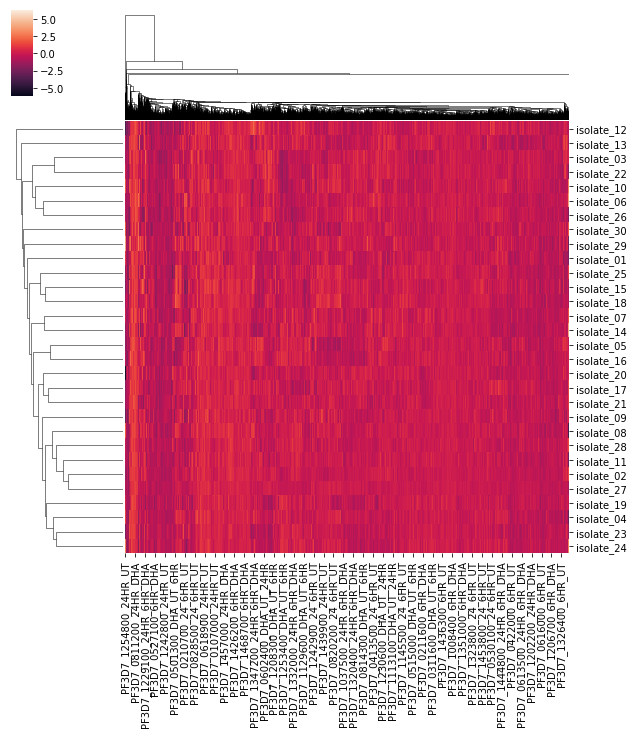

In [54]:
c = sn.clustermap(flat_train)

In [55]:
tmp = flat_train.copy()
tmp = pd.concat([flat_IC50, tmp], axis=1) 

In [56]:
tmp.head()

,DHA_IC50,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_01,2.177,-0.407052,-0.454890,0.240787,-0.323857,1.010718,1.297258,0.878644,0.462625,-0.174305,...,-0.861167,-0.788560,-0.449115,0.103816,-0.387161,-0.940092,-0.204190,-0.306021,0.607113,0.708944
isolate_02,1.697,0.013135,-0.288905,0.156844,-0.258988,0.929380,1.122397,0.590085,1.358618,-0.556308,...,0.638573,-0.022643,-0.044861,-0.012785,0.488644,0.456568,-0.280932,0.137645,0.074284,-0.344293
isolate_03,1.799,0.048070,-0.340294,-0.135059,-0.284724,1.046211,1.230160,0.508137,0.867778,0.921045,...,1.312910,0.855652,-0.861166,0.302824,1.743635,0.579645,0.586608,-0.008594,-0.708807,-0.113605
isolate_04,0.710,-0.072510,-0.545671,-0.385077,-0.304287,0.965489,1.154897,0.879867,1.587606,0.367313,...,0.640146,-0.186046,-0.064471,0.092535,0.253309,0.096304,-0.065763,-1.011158,-0.072207,0.873189
isolate_05,2.025,-0.226061,-0.371508,-0.262047,-0.062498,1.234422,1.881968,1.436707,0.874129,-0.399773,...,-0.223396,1.337816,-0.006811,-1.209072,0.150276,1.352536,-0.197253,1.041507,0.677745,-0.561015


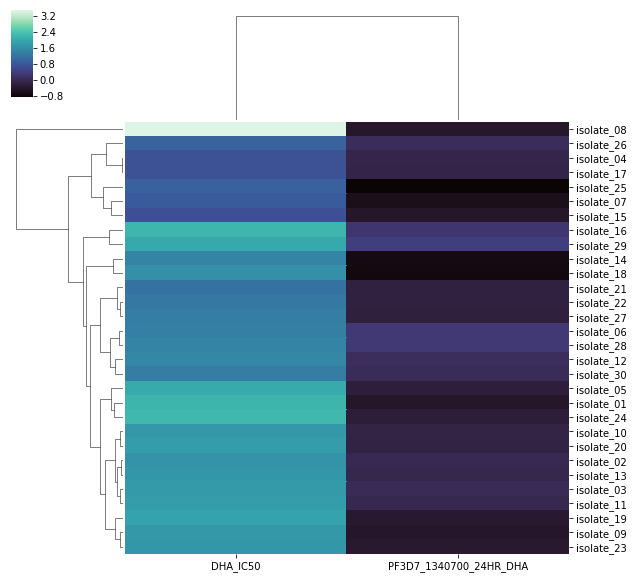

In [57]:
c = sn.clustermap(tmp.iloc[:,0:2], cmap="mako")

In [58]:
ic50 = tmp.pop("DHA_IC50")
reds_tuples = [(i,0,0) for i in np.linspace(0,1,30)]
reds_hex = [colors.to_hex(red) for red in reds_tuples]
greens_tuples = [(0,i,0) for i in np.linspace(0,1,30)]
greens_hex = [colors.to_hex(green) for green in greens_tuples]
blues_tuples = [(0,0,i) for i in np.linspace(0,1,30)]
blues_hex = [colors.to_hex(blue) for blue in blues_tuples]

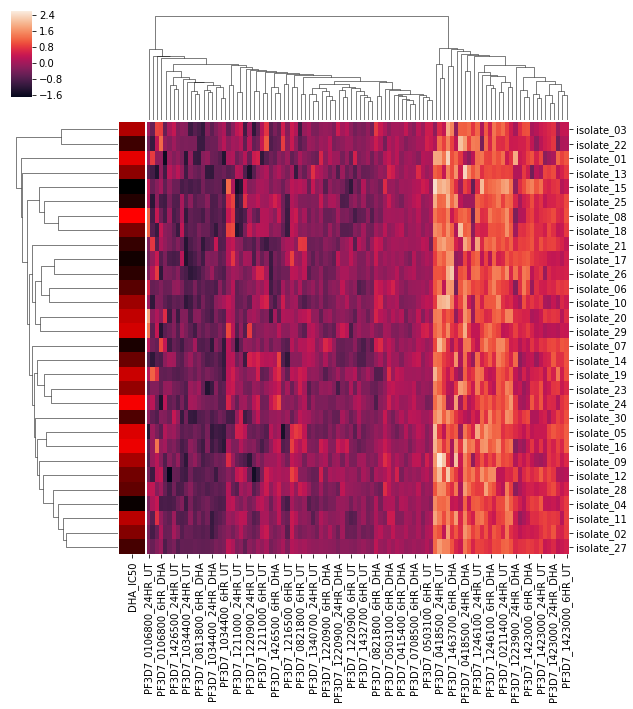

In [59]:
lut = dict(zip(ic50.sort_values(), reds_hex))
row_colors = ic50.map(lut)
g = sn.clustermap(tmp.iloc[:,0:100], row_colors=row_colors)

### 3.4 Make clustermaps by GO processes

In [60]:
GO.head(100)

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0015031,protein transport,1,"[PF3D7_1434700, PF3D7_0501300, PF3D7_0103100, ...",6
1,GO:0042147,"retrograde transport, endosome to Golgi",1,"[PF3D7_0103100, PF3D7_1250300, PF3D7_1110500, ...",4
2,GO:0015860,purine nucleoside transmembrane transport,1,"[PF3D7_1347200, PF3D7_0103200]",2
3,GO:2001139,negative regulation of phospholipid transport,1,[PF3D7_0104200],1
4,GO:0015914,phospholipid transport,1,"[PF3D7_0104200, PF3D7_1463500, PF3D7_1219600]",3
5,GO:0060627,regulation of vesicle-mediated transport,1,"[PF3D7_1144900, PF3D7_0211200, PF3D7_1231100, ...",10
6,GO:0000278,mitotic cell cycle,1,"[PF3D7_0107000, PF3D7_1446600, PF3D7_0317200, ...",4
7,GO:0009405,pathogenesis,1,"[PF3D7_0826100, PF3D7_1209300, PF3D7_1302200, ...",10
8,GO:0010998,regulation of translational initiation by eIF2...,1,[PF3D7_0107600],1
9,GO:0007021,tubulin complex assembly,1,[PF3D7_0109400],1


In [61]:
def getGenesFromGO(GO_process_ID):
    return list(GO[GO["GO Process ID"]==GO_process_ID]["Gene_ID"])[0]

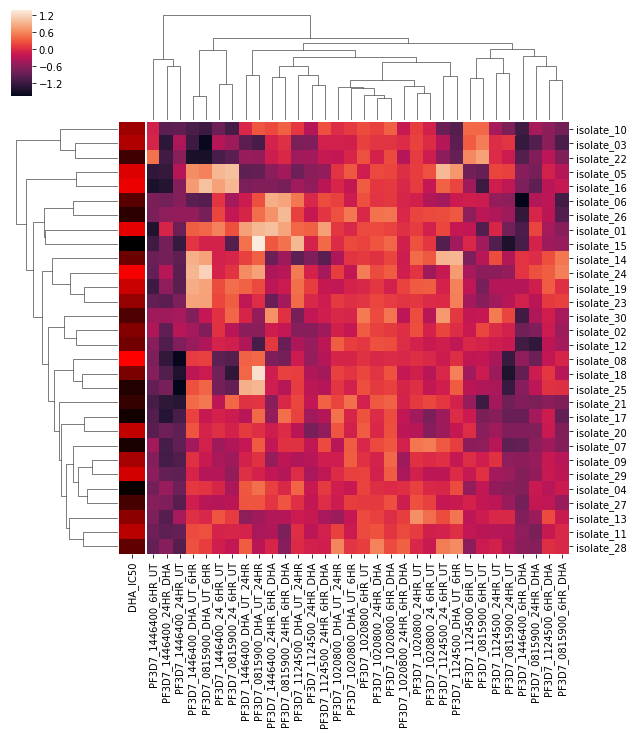

In [62]:
genes_selected = getGenesFromGO("GO:0006086")
cols = [gene_dict[gene] + gene_deltas_dict[gene] for gene in genes_selected]
final_cols = []
for col in cols:
    final_cols = final_cols + col
lut = dict(zip(ic50.sort_values(), reds_hex))
row_colors = ic50.map(lut)
g = sn.clustermap(tmp[final_cols], row_colors=row_colors)

In [63]:
ic50.sort_values()

isolate_15    0.6933
isolate_04    0.7100
isolate_17    0.7200
isolate_07    0.8567
isolate_25    0.9350
isolate_26    0.9667
isolate_21    1.1900
isolate_22    1.2830
isolate_27    1.3480
isolate_30    1.3630
isolate_06    1.3670
isolate_28    1.4530
isolate_14    1.4700
isolate_12    1.5170
isolate_18    1.6470
isolate_02    1.6970
isolate_13    1.7230
isolate_23    1.7440
isolate_10    1.7540
isolate_09    1.7650
isolate_03    1.7990
isolate_11    1.8200
isolate_20    1.8240
isolate_19    1.9060
isolate_29    1.9900
isolate_05    2.0250
isolate_01    2.1770
isolate_16    2.2100
isolate_24    2.2360
isolate_08    3.4600
Name: DHA_IC50, dtype: float64

## 4. Format the test data to look the same as flat_train

In [64]:
test.head()

,Sample_Names,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_31.24HR.DHA.BRep1,isolate_31,24HR,DHA,BRep1,0.416583,-2.304394,-1.279308,-1.128485,0.129698,...,0.117763,-1.650283,-0.520373,-1.301428,-5.326124,-0.352736,-1.567931,-4.446439,-1.875440,NaN
1,isolate_31.24HR.DHA.BRep2,isolate_31,24HR,DHA,BRep2,0.247195,-2.176939,-1.470318,-0.676434,-0.206543,...,0.472336,-1.151134,-0.342707,-1.001569,-5.337602,-0.672201,-1.494983,-4.299427,-1.553652,NaN
2,isolate_31.24HR.UT.BRep1,isolate_31,24HR,UT,BRep1,-0.197699,-0.572531,0.270896,0.557528,-0.698585,...,-0.309768,-6.330446,-0.850889,-1.603832,-3.256602,-2.517157,-0.650735,-4.841146,0.153951,NaN
3,isolate_31.24HR.UT.BRep2,isolate_31,24HR,UT,BRep2,0.966916,-1.723830,-1.102392,-0.797996,0.032847,...,-0.254186,-1.516661,-1.916219,-1.858716,-6.483167,-0.827476,-1.454423,-5.264615,-2.367444,NaN
4,isolate_31.6HR.DHA.BRep1,isolate_31,6HR,DHA,BRep1,0.125273,-1.665749,-2.510245,-1.454094,-1.763451,...,0.653097,-2.383878,-2.731928,-2.557962,-5.697488,-3.466542,-2.147289,-4.358510,-1.929927,NaN


### 4.1 Filter the trest DataFrame 

Keep only the important genes found in steps 2.1 to 2.4.

In [65]:
genes_to_keep_test = set(list(test.columns)) & set(result)
genes_to_keep_test = list(genes_to_keep_test)
columns_to_keep_test = list(test.columns)[0:5] + \
[list(test.columns)[-1]] + genes_to_keep_test
columns_to_keep_test

['Sample_Names',
 'Isolate',
 'Timepoint',
 'Treatment',
 'BioRep',
 'DHA_IC50',
 'PF3D7_1340700',
 'PF3D7_1246100',
 'PF3D7_0106800',
 'PF3D7_1431300',
 'PF3D7_1426500',
 'PF3D7_1216500',
 'PF3D7_0418500',
 'PF3D7_0821800',
 'PF3D7_1432700',
 'PF3D7_1463700',
 'PF3D7_1329100',
 'PF3D7_1032500',
 'PF3D7_0319600',
 'PF3D7_0503100',
 'PF3D7_0813800',
 'PF3D7_0415400',
 'PF3D7_1423000',
 'PF3D7_1223900',
 'PF3D7_0321200',
 'PF3D7_1220900',
 'PF3D7_1034400',
 'PF3D7_0211400',
 'PF3D7_0708500',
 'PF3D7_1211000',
 'PF3D7_1418100',
 'PF3D7_1437700',
 'PF3D7_0729900',
 'PF3D7_1426300',
 'PF3D7_1134000',
 'PF3D7_0807300',
 'PF3D7_1302200',
 'PF3D7_0805200',
 'PF3D7_0816000',
 'PF3D7_0909200',
 'PF3D7_1251200',
 'PF3D7_0826100',
 'PF3D7_1446600',
 'PF3D7_0820200',
 'PF3D7_1144900',
 'PF3D7_0826700',
 'PF3D7_0711000',
 'PF3D7_1209900',
 'PF3D7_0206200',
 'PF3D7_1246200',
 'PF3D7_1119500',
 'PF3D7_1121700',
 'PF3D7_0211600',
 'PF3D7_1141600',
 'PF3D7_1360500',
 'PF3D7_1008400',
 'PF3D7_1471100',
 

In [66]:
filtered_test = test[columns_to_keep_test]
filtered_test.head()

,Sample_Names,Isolate,Timepoint,Treatment,BioRep,DHA_IC50,PF3D7_1340700,PF3D7_1246100,PF3D7_0106800,PF3D7_1431300,...,PF3D7_0417100,PF3D7_1332000,PF3D7_1204300,PF3D7_0729400,PF3D7_0820700,PF3D7_1320500,PF3D7_0109400,PF3D7_0626800,PF3D7_1457000,PF3D7_1361800
0,isolate_31.24HR.DHA.BRep1,isolate_31,24HR,DHA,BRep1,NaN,-0.035783,0.813426,-0.216450,0.287176,...,-0.964881,0.457766,0.811943,0.112892,-0.596228,-0.017193,2.147786,0.340761,0.776286,-0.655325
1,isolate_31.24HR.DHA.BRep2,isolate_31,24HR,DHA,BRep2,NaN,-0.131838,1.670057,-0.953078,0.525512,...,-0.338122,-0.057649,0.283079,0.082284,-0.544481,-1.049787,-0.007370,-0.460249,-0.373568,0.471813
2,isolate_31.24HR.UT.BRep1,isolate_31,24HR,UT,BRep1,NaN,0.050558,0.693927,-1.400809,0.309783,...,-0.497208,-0.460000,0.628652,0.440694,-0.208451,-0.870272,0.826756,-0.662771,0.655524,0.004253
3,isolate_31.24HR.UT.BRep2,isolate_31,24HR,UT,BRep2,NaN,-0.525760,1.091758,-1.383279,0.412176,...,-0.794517,-0.277922,0.050068,0.134852,-0.309834,-0.897544,0.336315,-0.447088,-0.413733,0.532471
4,isolate_31.6HR.DHA.BRep1,isolate_31,6HR,DHA,BRep1,NaN,0.052231,0.868892,1.172927,0.639622,...,-1.375153,1.379155,0.029226,-0.227345,-0.211099,0.461435,1.890544,-1.629037,0.601067,0.619227


### 4.2 Create new test DataFrame with engineered features

In [67]:
aggregated_means_test = filtered_test.groupby(["Isolate","Timepoint","Treatment"]).mean()
aggregated_means_test.head()

DHA_IC50  PF3D7_1340700  PF3D7_1246100  \
Isolate    Timepoint Treatment                                           
isolate_31 24HR      DHA             NaN      -0.083810       1.241742   
                     UT              NaN      -0.237601       0.892842   
           6HR       DHA             NaN      -0.393627       0.944031   
                     UT              NaN       0.157657       1.185809   
isolate_32 24HR      DHA             NaN      -0.100321       0.499754   

                                PF3D7_0106800  PF3D7_1431300  PF3D7_1426500  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA            -0.584764       0.406344      -0.601684   
                     UT             -1.392044       0.360979      -0.111654   
           6HR       DHA             0.034631       0.516514      -0.209266   
                     UT              0.725623       0.506190      -0.356585   
isolate_32 24HR      DHA            -0.369133       0.963199      -0.515570   

                                PF3D7_1216500  PF3D7_0418500  PF3D7_0821800  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA            -0.709796       2.074260       0.161932   
                     UT             -0.427267       1.313479      -0.428928   
           6HR       DHA            -0.341583       1.202838       0.160301   
                     UT             -0.234437       1.763475       0.691006   
isolate_32 24HR      DHA            -0.678187       1.743285       0.357572   

                                PF3D7_1432700  ...  PF3D7_0417100  \
Isolate    Timepoint Treatment                 ...                  
isolate_31 24HR      DHA            -0.204042  ...      -0.651502   
                     UT             -0.499154  ...      -0.645862   
           6HR       DHA             0.008916  ...      -0.524208   
                     UT              0.132602  ...      -0.949507   
isolate_32 24HR      DHA            -0.214071  ...      -0.725705   

                                PF3D7_1332000  PF3D7_1204300  PF3D7_0729400  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA             0.200058       0.547511       0.097588   
                     UT             -0.368961       0.339360       0.287773   
           6HR       DHA             0.581480      -0.035287       0.143426   
                     UT              0.901375       0.404390       0.173601   
isolate_32 24HR      DHA             0.496599       0.533537       0.505886   

                                PF3D7_0820700  PF3D7_1320500  PF3D7_0109400  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA            -0.570354      -0.533490       1.070208   
                     UT             -0.259143      -0.883908       0.581535   
           6HR       DHA            -0.137303       0.133011       1.476912   
                     UT             -0.142765       0.470052       1.967150   
isolate_32 24HR      DHA            -0.417803      -0.059897       1.030998   

                                PF3D7_0626800  PF3D7_1457000  PF3D7_1361800  
Isolate    Timepoint Treatment                                               
isolate_31 24HR      DHA            -0.059744       0.201359      -0.091756  
                     UT             -0.554929       0.120895       0.268362  
           6HR       DHA            -1.216439       0.142193       0.463687  
                     UT             -0.033341       0.707868      -0.528882  
isolate_32 24HR      DHA             0.084103       0.467497      -0.256154  

[5 rows x 482 columns]

### 4.3 Flatten the aggregated_means_test data frame 
See point 3.2 for reference

In [68]:
isolates_list_test=aggregated_means_test.index.get_level_values(0)
isolates_list_test=list(dict.fromkeys(isolates_list_test))
isolates_list_test

['isolate_31',
 'isolate_32',
 'isolate_33',
 'isolate_34',
 'isolate_35',
 'isolate_36',
 'isolate_37',
 'isolate_38',
 'isolate_39',
 'isolate_40',
 'isolate_41',
 'isolate_42',
 'isolate_43',
 'isolate_44',
 'isolate_45',
 'isolate_46',
 'isolate_47',
 'isolate_48',
 'isolate_49',
 'isolate_50',
 'isolate_51',
 'isolate_52',
 'isolate_53',
 'isolate_54',
 'isolate_55']

## Save isolates_list_test to file

In [69]:
f = open("../data/isolates_test.txt", "w")
f.write("\n".join(isolates_list_test))
f.close()

In [70]:
flat_test=pd.DataFrame()
genes=[]
for gene in genes_list:
    temp_list=[]
    for isolate in isolates_list_test:
        temp_list.append(aggregated_means_test.loc[isolate][gene].tolist())
    flat_test=pd.concat([flat_test,pd.DataFrame(data=temp_list,columns=gene_dict[gene])],axis=1)

In [71]:
flat_test.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_6HR_DHA,PF3D7_0626800_6HR_UT,PF3D7_1457000_24HR_DHA,PF3D7_1457000_24HR_UT,PF3D7_1457000_6HR_DHA,PF3D7_1457000_6HR_UT,PF3D7_1361800_24HR_DHA,PF3D7_1361800_24HR_UT,PF3D7_1361800_6HR_DHA,PF3D7_1361800_6HR_UT
0,-0.083810,-0.237601,-0.393627,0.157657,1.241742,0.892842,0.944031,1.185809,-0.584764,-1.392044,...,-1.216439,-0.033341,0.201359,0.120895,0.142193,0.707868,-0.091756,0.268362,0.463687,-0.528882
1,-0.100321,-0.315922,-0.205521,-0.549832,0.499754,1.074672,0.484960,1.243588,-0.369133,0.305464,...,-0.026898,-0.556272,0.467497,0.386736,0.947438,0.456833,-0.256154,-0.217614,-0.504567,1.047526
2,-0.306169,-0.196336,-0.129218,-0.254396,1.711083,0.716859,0.887892,1.320313,0.176647,-1.046201,...,0.075071,-0.517042,0.243459,-0.101406,0.095006,0.114412,0.100908,-0.022938,0.162045,0.427076
3,0.108025,-0.107807,-0.210586,-0.346967,0.856864,0.916836,0.771997,1.151976,0.257807,0.219475,...,-0.116904,-0.075585,0.400159,0.169510,-0.077502,0.968938,0.379818,0.382186,0.657446,-0.495787
4,-0.383524,-0.542011,-0.383707,-0.488203,1.240874,0.366477,0.248377,0.872176,-0.288073,0.539267,...,0.358994,-1.091846,0.115314,0.606499,0.955973,-0.487765,-0.174142,-0.023038,-1.355959,0.873472


### 4.4 Add the diferential between each timepoint-treatment combination
See point 3.3 for reference

In [72]:
for gene in gene_dict.keys():
    
    state1=gene_dict[gene][0] #gene_24HR_DHA
    state2=gene_dict[gene][1] #gene_24HR_UT
    state3=gene_dict[gene][2] #gene_6HR_DHA
    state4=gene_dict[gene][3] #gene_6HR_UT
    
    delta_A=flat_test[state1]-flat_test[state3]
    delta_B=flat_test[state2]-flat_test[state4]
    delta_C=flat_test[state3]-flat_test[state4]
    delta_D=flat_test[state1]-flat_test[state2]
    
    delta_A_label=gene_deltas_dict[gene][0] #gene_24HR_6HR_DHA
    delta_B_label=gene_deltas_dict[gene][1] #gene_24HR_6HR_UT
    delta_C_label=gene_deltas_dict[gene][2] #gene_DHA_UT_6HR
    delta_D_label=gene_deltas_dict[gene][3] #gene_DHA_UT_24HR
    
    temp_df=pd.DataFrame({delta_A_label:delta_A,delta_B_label:delta_B,delta_C_label:delta_C,delta_D_label:delta_D})
    flat_test=pd.concat([flat_test,temp_df],axis=1)

In [73]:
flat_test.head()
flat_test.index=isolates_list_test
flat_test.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_31,-0.083810,-0.237601,-0.393627,0.157657,1.241742,0.892842,0.944031,1.185809,-0.584764,-1.392044,...,-1.183098,0.495186,0.059165,-0.586973,-0.565675,0.080463,-0.555442,0.797244,0.992569,-0.360118
isolate_32,-0.100321,-0.315922,-0.205521,-0.549832,0.499754,1.074672,0.484960,1.243588,-0.369133,0.305464,...,0.529374,0.228348,-0.479942,-0.070097,0.490606,0.080761,0.248413,-1.265139,-1.552093,-0.038541
isolate_33,-0.306169,-0.196336,-0.129218,-0.254396,1.711083,0.716859,0.887892,1.320313,0.176647,-1.046201,...,0.592113,0.538705,0.148453,-0.215818,-0.019406,0.344865,-0.061137,-0.450015,-0.265031,0.123846
isolate_34,0.108025,-0.107807,-0.210586,-0.346967,0.856864,0.916836,0.771997,1.151976,0.257807,0.219475,...,-0.041319,0.201217,0.477662,-0.799427,-1.046440,0.230649,-0.277628,0.877974,1.153233,-0.002368
isolate_35,-0.383524,-0.542011,-0.383707,-0.488203,1.240874,0.366477,0.248377,0.872176,-0.288073,0.539267,...,1.450840,-0.549614,-0.840660,1.094264,1.443738,-0.491185,1.181817,-0.896510,-2.229431,-0.151104


In [74]:
flat_test.to_csv('../data/flat_test.csv',sep=',')

## Save the genes_dict to a file

In [80]:
genes_dict={}
for gene in gene_dict:
    genes_dict[gene]=gene_dict[gene]+gene_deltas_dict[gene]
genes_dict

{'PF3D7_1340700': ['PF3D7_1340700_24HR_DHA',
  'PF3D7_1340700_24HR_UT',
  'PF3D7_1340700_6HR_DHA',
  'PF3D7_1340700_6HR_UT',
  'PF3D7_1340700_24HR_6HR_DHA',
  'PF3D7_1340700_24_6HR_UT',
  'PF3D7_1340700_DHA_UT_6HR',
  'PF3D7_1340700_DHA_UT_24HR'],
 'PF3D7_1246100': ['PF3D7_1246100_24HR_DHA',
  'PF3D7_1246100_24HR_UT',
  'PF3D7_1246100_6HR_DHA',
  'PF3D7_1246100_6HR_UT',
  'PF3D7_1246100_24HR_6HR_DHA',
  'PF3D7_1246100_24_6HR_UT',
  'PF3D7_1246100_DHA_UT_6HR',
  'PF3D7_1246100_DHA_UT_24HR'],
 'PF3D7_0106800': ['PF3D7_0106800_24HR_DHA',
  'PF3D7_0106800_24HR_UT',
  'PF3D7_0106800_6HR_DHA',
  'PF3D7_0106800_6HR_UT',
  'PF3D7_0106800_24HR_6HR_DHA',
  'PF3D7_0106800_24_6HR_UT',
  'PF3D7_0106800_DHA_UT_6HR',
  'PF3D7_0106800_DHA_UT_24HR'],
 'PF3D7_1431300': ['PF3D7_1431300_24HR_DHA',
  'PF3D7_1431300_24HR_UT',
  'PF3D7_1431300_6HR_DHA',
  'PF3D7_1431300_6HR_UT',
  'PF3D7_1431300_24HR_6HR_DHA',
  'PF3D7_1431300_24_6HR_UT',
  'PF3D7_1431300_DHA_UT_6HR',
  'PF3D7_1431300_DHA_UT_24HR'],
 'PF3D7_

In [81]:
genes_df=pd.DataFrame()
for gene in genes_dict:
    temp_df=pd.DataFrame({gene: genes_dict[gene]})
    genes_df=pd.concat([genes_df,temp_df],axis=1)

In [82]:
genes_df

,PF3D7_1340700,PF3D7_1246100,PF3D7_0106800,PF3D7_1431300,PF3D7_1426500,PF3D7_1216500,PF3D7_0418500,PF3D7_0821800,PF3D7_1432700,PF3D7_1463700,...,PF3D7_0417100,PF3D7_1332000,PF3D7_1204300,PF3D7_0729400,PF3D7_0820700,PF3D7_1320500,PF3D7_0109400,PF3D7_0626800,PF3D7_1457000,PF3D7_1361800
0,PF3D7_1340700_24HR_DHA,PF3D7_1246100_24HR_DHA,PF3D7_0106800_24HR_DHA,PF3D7_1431300_24HR_DHA,PF3D7_1426500_24HR_DHA,PF3D7_1216500_24HR_DHA,PF3D7_0418500_24HR_DHA,PF3D7_0821800_24HR_DHA,PF3D7_1432700_24HR_DHA,PF3D7_1463700_24HR_DHA,...,PF3D7_0417100_24HR_DHA,PF3D7_1332000_24HR_DHA,PF3D7_1204300_24HR_DHA,PF3D7_0729400_24HR_DHA,PF3D7_0820700_24HR_DHA,PF3D7_1320500_24HR_DHA,PF3D7_0109400_24HR_DHA,PF3D7_0626800_24HR_DHA,PF3D7_1457000_24HR_DHA,PF3D7_1361800_24HR_DHA
1,PF3D7_1340700_24HR_UT,PF3D7_1246100_24HR_UT,PF3D7_0106800_24HR_UT,PF3D7_1431300_24HR_UT,PF3D7_1426500_24HR_UT,PF3D7_1216500_24HR_UT,PF3D7_0418500_24HR_UT,PF3D7_0821800_24HR_UT,PF3D7_1432700_24HR_UT,PF3D7_1463700_24HR_UT,...,PF3D7_0417100_24HR_UT,PF3D7_1332000_24HR_UT,PF3D7_1204300_24HR_UT,PF3D7_0729400_24HR_UT,PF3D7_0820700_24HR_UT,PF3D7_1320500_24HR_UT,PF3D7_0109400_24HR_UT,PF3D7_0626800_24HR_UT,PF3D7_1457000_24HR_UT,PF3D7_1361800_24HR_UT
2,PF3D7_1340700_6HR_DHA,PF3D7_1246100_6HR_DHA,PF3D7_0106800_6HR_DHA,PF3D7_1431300_6HR_DHA,PF3D7_1426500_6HR_DHA,PF3D7_1216500_6HR_DHA,PF3D7_0418500_6HR_DHA,PF3D7_0821800_6HR_DHA,PF3D7_1432700_6HR_DHA,PF3D7_1463700_6HR_DHA,...,PF3D7_0417100_6HR_DHA,PF3D7_1332000_6HR_DHA,PF3D7_1204300_6HR_DHA,PF3D7_0729400_6HR_DHA,PF3D7_0820700_6HR_DHA,PF3D7_1320500_6HR_DHA,PF3D7_0109400_6HR_DHA,PF3D7_0626800_6HR_DHA,PF3D7_1457000_6HR_DHA,PF3D7_1361800_6HR_DHA
3,PF3D7_1340700_6HR_UT,PF3D7_1246100_6HR_UT,PF3D7_0106800_6HR_UT,PF3D7_1431300_6HR_UT,PF3D7_1426500_6HR_UT,PF3D7_1216500_6HR_UT,PF3D7_0418500_6HR_UT,PF3D7_0821800_6HR_UT,PF3D7_1432700_6HR_UT,PF3D7_1463700_6HR_UT,...,PF3D7_0417100_6HR_UT,PF3D7_1332000_6HR_UT,PF3D7_1204300_6HR_UT,PF3D7_0729400_6HR_UT,PF3D7_0820700_6HR_UT,PF3D7_1320500_6HR_UT,PF3D7_0109400_6HR_UT,PF3D7_0626800_6HR_UT,PF3D7_1457000_6HR_UT,PF3D7_1361800_6HR_UT
4,PF3D7_1340700_24HR_6HR_DHA,PF3D7_1246100_24HR_6HR_DHA,PF3D7_0106800_24HR_6HR_DHA,PF3D7_1431300_24HR_6HR_DHA,PF3D7_1426500_24HR_6HR_DHA,PF3D7_1216500_24HR_6HR_DHA,PF3D7_0418500_24HR_6HR_DHA,PF3D7_0821800_24HR_6HR_DHA,PF3D7_1432700_24HR_6HR_DHA,PF3D7_1463700_24HR_6HR_DHA,...,PF3D7_0417100_24HR_6HR_DHA,PF3D7_1332000_24HR_6HR_DHA,PF3D7_1204300_24HR_6HR_DHA,PF3D7_0729400_24HR_6HR_DHA,PF3D7_0820700_24HR_6HR_DHA,PF3D7_1320500_24HR_6HR_DHA,PF3D7_0109400_24HR_6HR_DHA,PF3D7_0626800_24HR_6HR_DHA,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1361800_24HR_6HR_DHA
5,PF3D7_1340700_24_6HR_UT,PF3D7_1246100_24_6HR_UT,PF3D7_0106800_24_6HR_UT,PF3D7_1431300_24_6HR_UT,PF3D7_1426500_24_6HR_UT,PF3D7_1216500_24_6HR_UT,PF3D7_0418500_24_6HR_UT,PF3D7_0821800_24_6HR_UT,PF3D7_1432700_24_6HR_UT,PF3D7_1463700_24_6HR_UT,...,PF3D7_0417100_24_6HR_UT,PF3D7_1332000_24_6HR_UT,PF3D7_1204300_24_6HR_UT,PF3D7_0729400_24_6HR_UT,PF3D7_0820700_24_6HR_UT,PF3D7_1320500_24_6HR_UT,PF3D7_0109400_24_6HR_UT,PF3D7_0626800_24_6HR_UT,PF3D7_1457000_24_6HR_UT,PF3D7_1361800_24_6HR_UT
6,PF3D7_1340700_DHA_UT_6HR,PF3D7_1246100_DHA_UT_6HR,PF3D7_0106800_DHA_UT_6HR,PF3D7_1431300_DHA_UT_6HR,PF3D7_1426500_DHA_UT_6HR,PF3D7_1216500_DHA_UT_6HR,PF3D7_0418500_DHA_UT_6HR,PF3D7_0821800_DHA_UT_6HR,PF3D7_1432700_DHA_UT_6HR,PF3D7_1463700_DHA_UT_6HR,...,PF3D7_0417100_DHA_UT_6HR,PF3D7_1332000_DHA_UT_6HR,PF3D7_1204300_DHA_UT_6HR,PF3D7_0729400_DHA_UT_6HR,PF3D7_0820700_DHA_UT_6HR,PF3D7_1320500_DHA_UT_6HR,PF3D7_0109400_DHA_UT_6HR,PF3D7_0626800_DHA_UT_6HR,PF3D7_1457000_DHA_UT_6HR,PF3D7_1361800_DHA_UT_6HR
7,PF3D7_1340700_DHA_UT_24HR,PF3D7_1246100_DHA_UT_24HR,PF3D7_0106800_DHA_UT_24HR,PF3D7_1431300_DHA_UT_24HR,PF3D7_1426500_DHA_UT_24HR,PF3D7_1216500_DHA_UT_24HR,PF3D7_0418500_DHA_UT_24HR,PF3D7_0821800_DHA_UT_24HR,PF3D7_1432700_DHA_UT_24HR,PF3D7_1463700_DHA_UT_24HR,...,PF3D7_0417100_DHA_UT_24HR,PF3D7_1332000_DHA_UT_24HR,PF3D7_1204300_DHA_UT_24HR,PF3D7_0729400_DHA_UT_24HR,PF3D7_0820700_DHA_UT_24

In [83]:
genes_df.to_csv('../data/genes_column_labels.csv')